In [1]:
using CSV, DataFrames, Statistics
using PyPlot # plotting library
using PyCall
using Printf
using FStrings
using LaTeXStrings # for L"$x$" to work instead of needing to do "\$x\$"

# check out all of the styles! https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
PyPlot.matplotlib.style.use("seaborn-pastel")

# change settings for all plots at once, e.g. font size
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 16

#make jupyter notebook print more dataframe columns
ENV["COLUMNS"]=160
hand = "2v2"

print("Ready to go!")

Ready to go!

-----

# Reading in the Data
Now reading in the metrics data for 2v2.

In [2]:
df_2v2 = CSV.read("results/2v2_metrics.csv", DataFrame, copycols=true)
first(df_2v2, 23)

,trial,arc_len,area_btwn,max_a_loc,max_a_reg,max_err,mvt_eff,r_fd,t_fd
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,sub1_2v2_a_n_1,0.915118,0.0210593,0.9,0.00490139,0.0276,0.402884,4.903,0.0277119
2,sub1_2v2_a_n_2,0.7148,0.0241181,0.9,0.00206908,0.0188,0.508725,8.6598,0.0194225
3,sub1_2v2_a_n_3,1.28018,0.0384869,0.9,0.00662867,0.0194,0.276161,6.2054,0.0429625
4,sub1_2v2_a_n_4,0.697772,0.0197627,0.9,0.00369012,0.0094,0.55733,4.5364,0.0268033
5,sub1_2v2_a_n_5,0.819163,0.0244863,0.9,0.00395754,0.0359,0.474739,6.4339,0.035901
6,sub2_2v2_a_n_1,0.67969,0.0111813,0.91,0.00220399,0.0153,0.460697,5.7871,0.0210955
7,sub2_2v2_a_n_2,1.16322,0.0402499,0.91,0.00261126,0.0329,0.199724,6.382,0.146714
8,sub2_2v2_a_n_3,1.03924,0.0401208,0.9,0.00178644,0.0224,0.247849,6.2749,0.092246
9,sub2_2v2_a_n_4,0.717419,0.0157235,0.89,0.00340992,0.0365,0.457589,5.0463,0.039268


## Asterisk Plot

![Avg Asterisk](./pics/avgd_2v2_3subs_n.jpg)

-----

# Histograms of Metrics
Now I will produce histogram plots of the metrics to see what kind of a distribution we get for all the trials.
Shamelessly taken from my previous datascience course at: [link](https://github.com/SimonEnsemble/data_science_course)

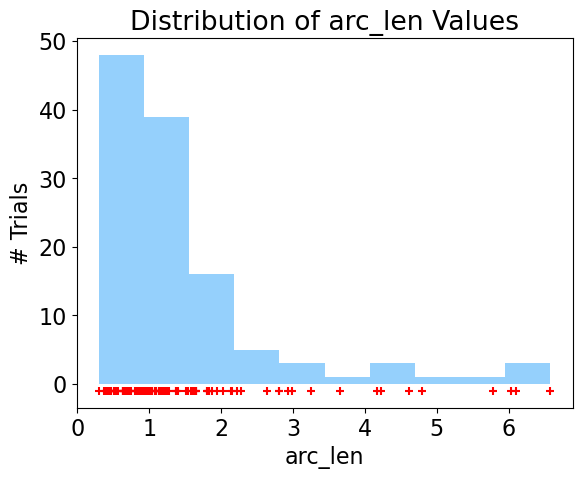

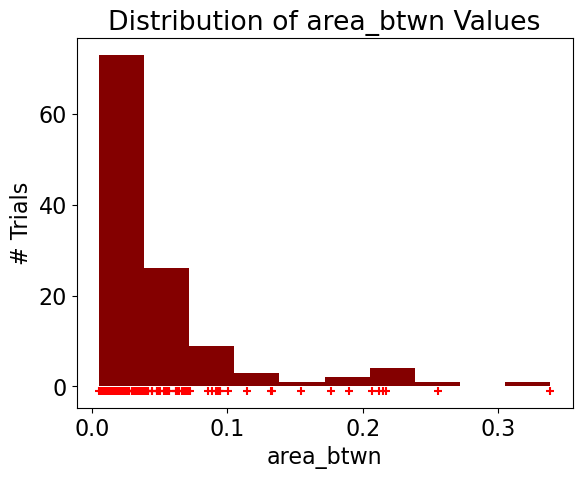

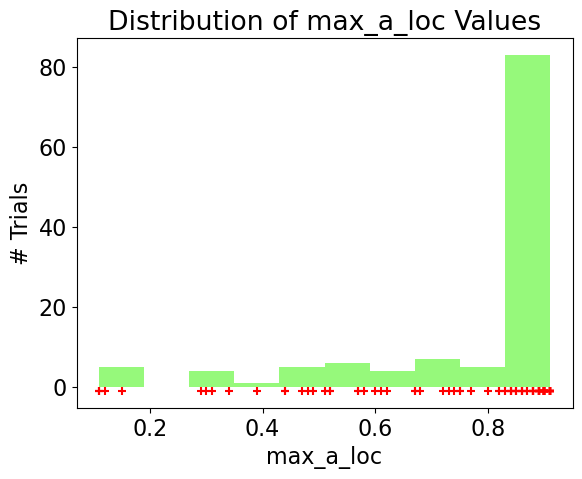

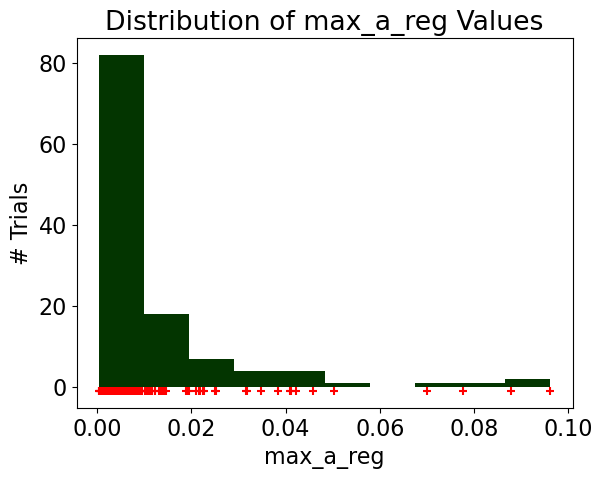

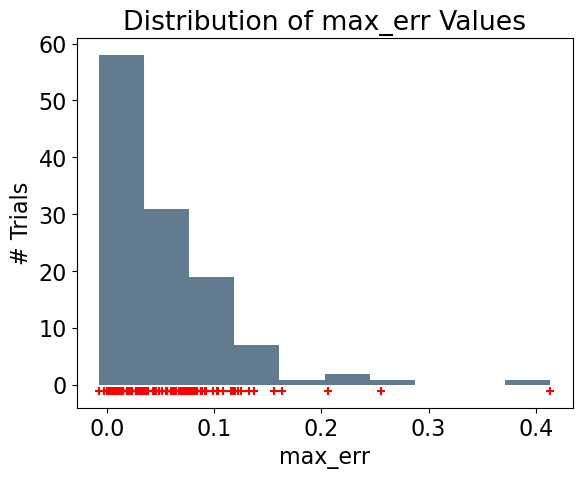

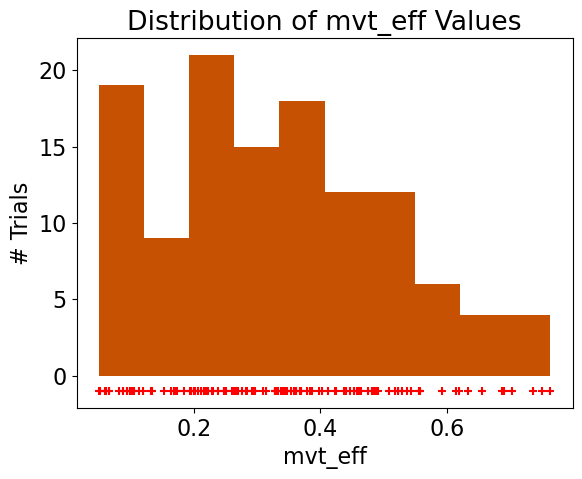

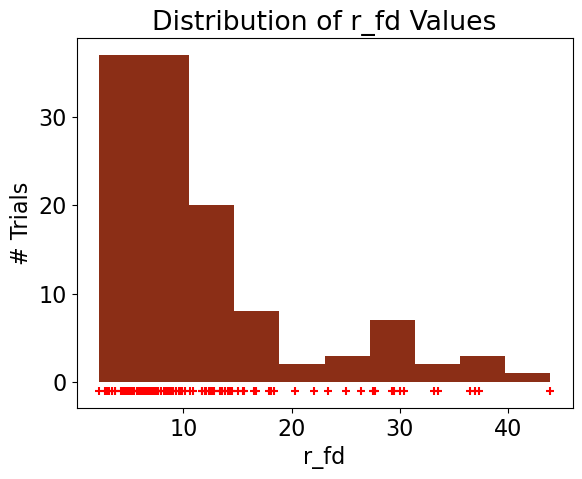

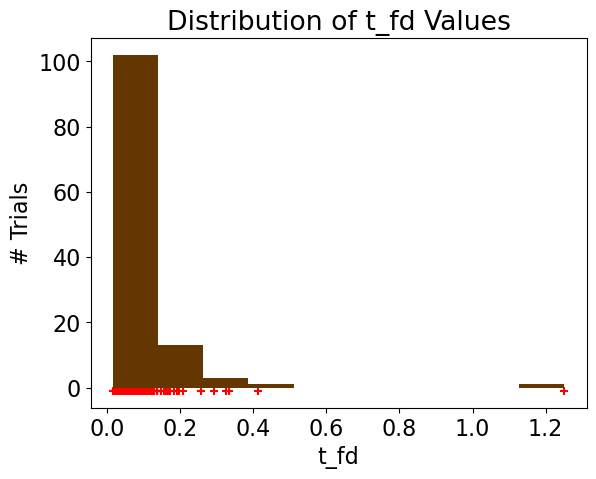

In [3]:
metrics = [:arc_len, :area_btwn, :max_a_loc, :max_a_reg, :max_err, :mvt_eff, :r_fd, :t_fd]

plot_colors = ["xkcd:light blue", "xkcd:dark red", "xkcd:light green", "xkcd:dark green",
               "xkcd:blue grey", "xkcd:dark orange", "xkcd:red brown", "xkcd:brown"]

i = 1
for m in metrics
    figure()
    hist(df_2v2[:, m], color=plot_colors[i]) #, normed=true)
    scatter(df_2v2[:, m], [-1 for i = 1:nrow(df_2v2)], marker="+", color="r")
    xlabel(f"{m}")
    ylabel("# Trials")
    title(f"Distribution of {m} Values")
    i = i + 1
end

### Observations of Histogram Plots
Based on what I see, here are the observations per metric (in order of appearance top to down):
* **arc length**: mostly concentrated at low arc lengths
* **max area region location**: mostly, the region of max error area is most commonly found at the end
* **max area region**: at the locations of max error area, the area of error (aka the area between the path and the target line) is still relatively low
* **max error**: values are distributed
* **movement efficiency**: values are distributed
* **rotational frechet distance**: aka max rotation error. Mostly low, but larger distribution at the low end
* translational frechet distance: all values are very low

----

# Metric Values by direction
Plot all metric values in bar charts by direction

In [17]:
subjects = ["sub1", "sub2", "sub3"]
translations = ["a", "b", "c", "d", "e", "f", "g", "h"]
rotations = ["n"]

function get_trial_vals(df::DataFrame, metric::Symbol, translation::String)
    hand = "2v2"
    subjects = ["sub1", "sub2", "sub3"]
    numbers = ["1", "2", "3", "4", "5"]
    
    values = []
    names = []
    
    for s in subjects
        for n in numbers
            trial_name = f"{s}_{hand}_{translation}_n_{n}"
            plot_name = f"{s}_{n}"
            row = df[df[!, :trial] .== trial_name, :]
            val = row[!, metric][1]
            
            push!(values, val)
            push!(names, plot_name)
        end
    end
    
    return values, names
end


function plt_metric_and_directions(m::Symbol, c::String="nothing")
    
    for t in translations
        figure()
        plt_title = f"{hand}: {m} - {t}_n"
        values, names = get_trial_vals(df_2v2, m, t)

        if c == "nothing"
            bar(names, values)
        else
            bar(names, values, color=c)
        end
        xticks(rotation=-45, ha="left")
        title(plt_title)
    end
end

print("Functions are ready!")

Functions are ready!

### Arc Length


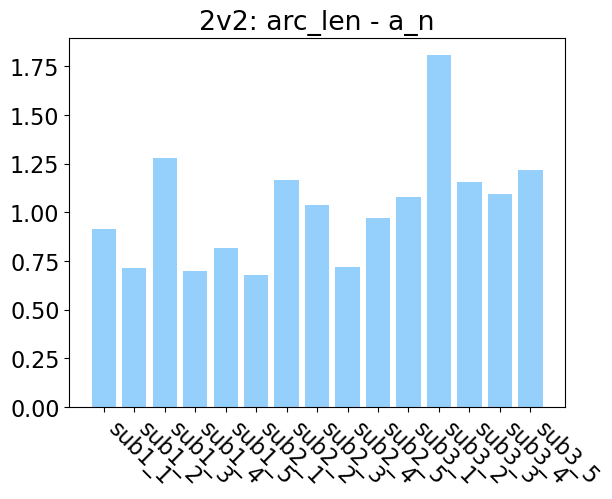

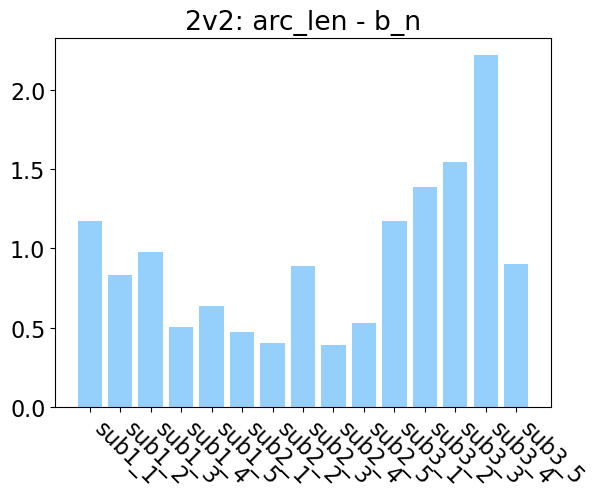

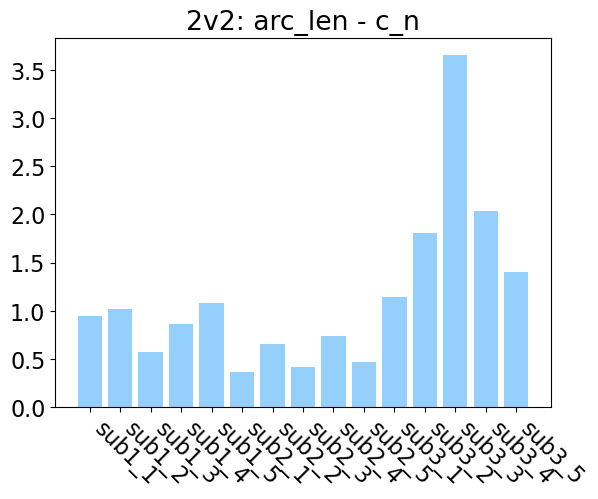

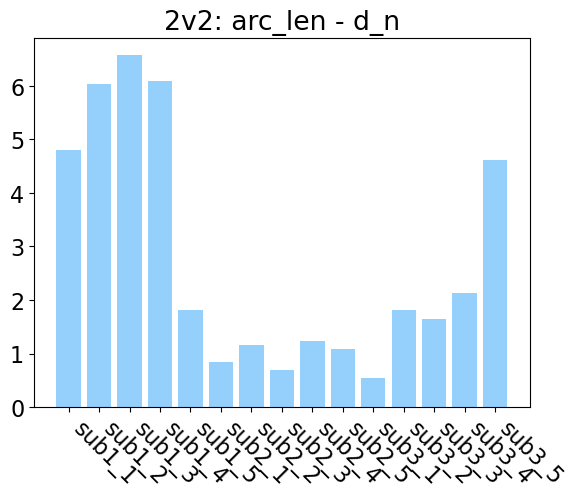

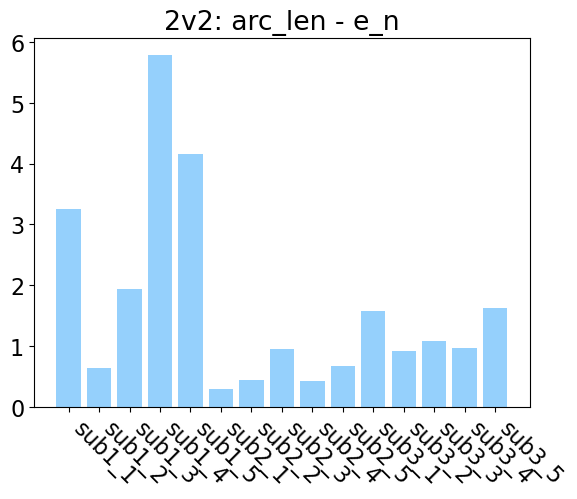

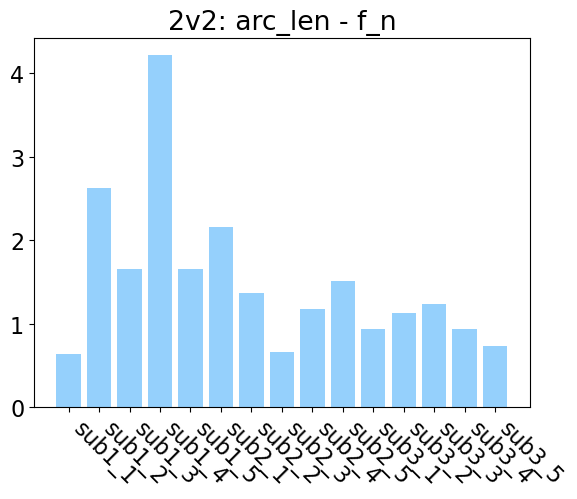

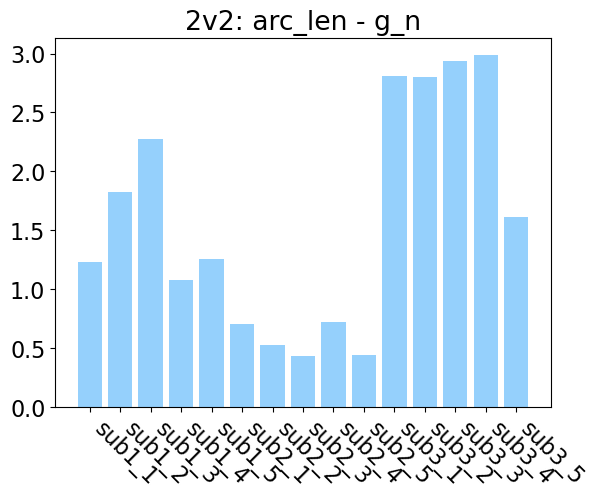

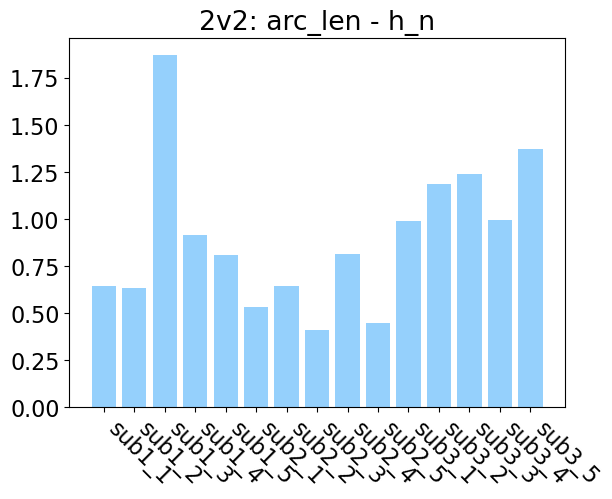

In [18]:
plt_metric_and_directions(:arc_len, "xkcd:light blue")

### area_btwn

metrics = [:arc_len, :area_btwn, :max_a_loc, :max_a_reg, :max_err, :mvt_eff, :r_fd, :t_fd]

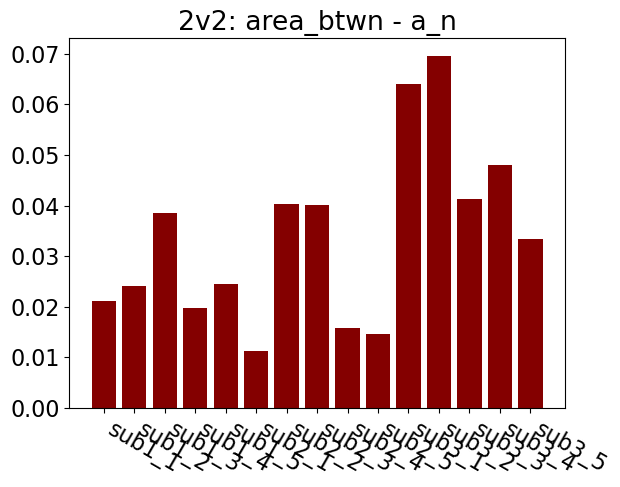

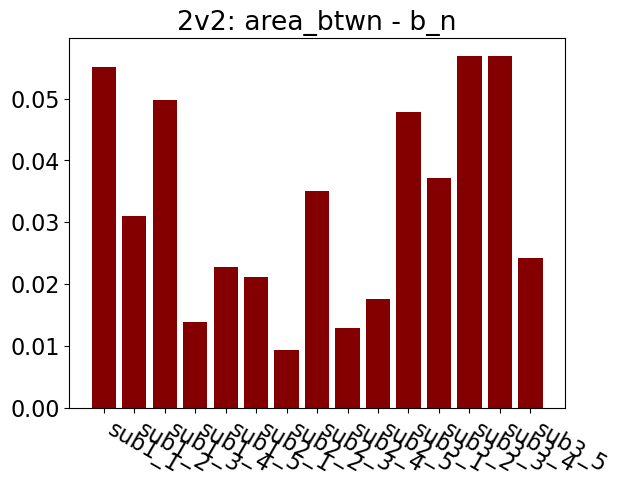

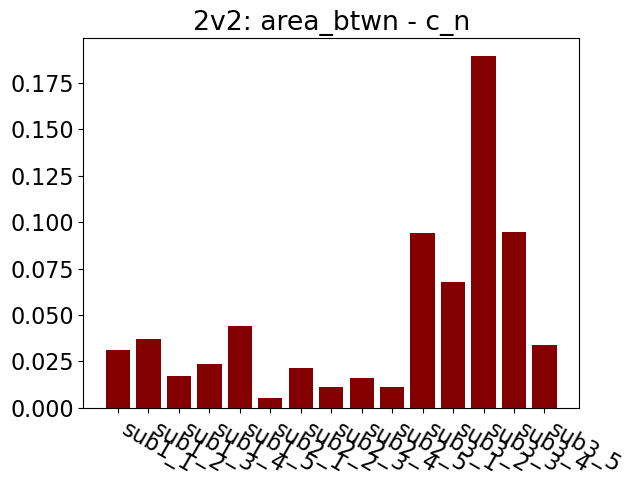

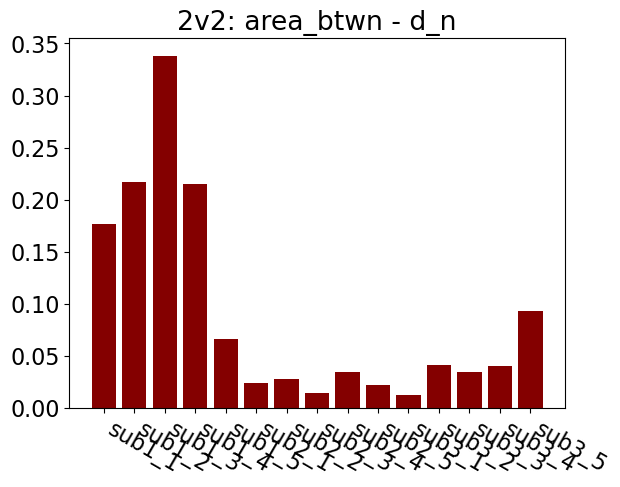

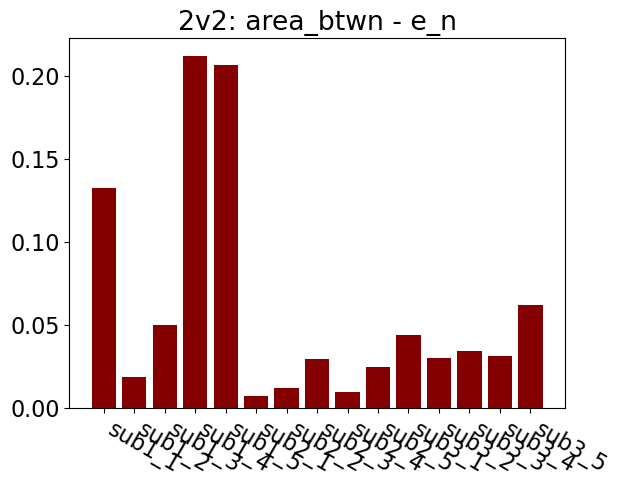

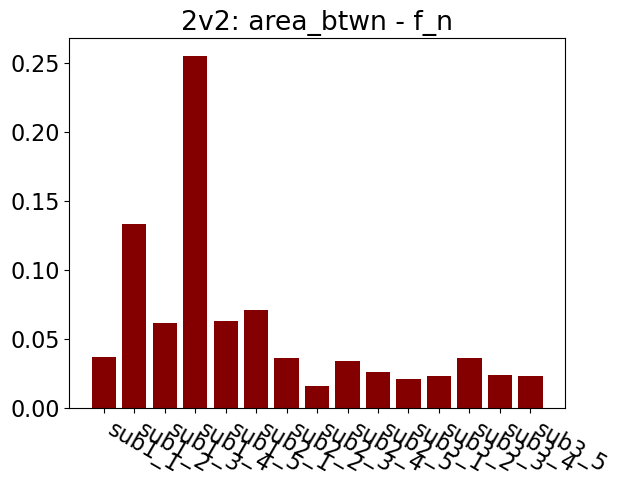

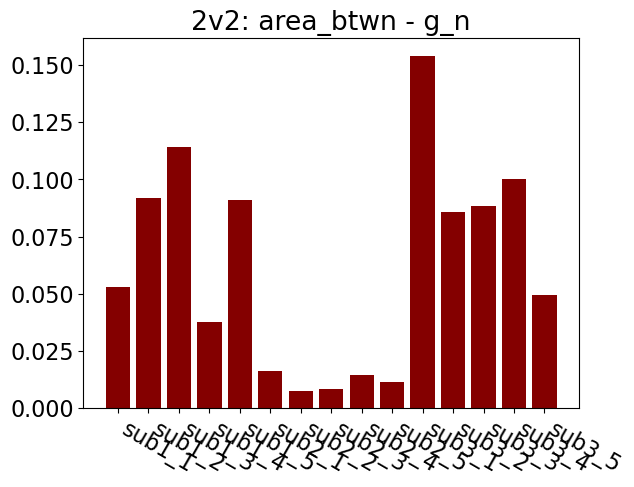

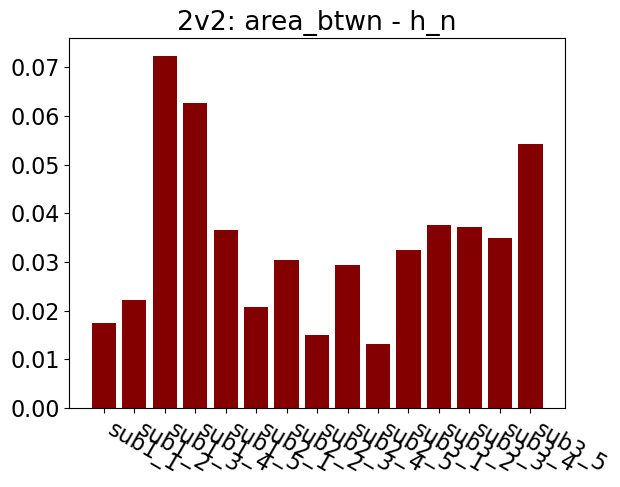

In [6]:
plt_metric_and_directions(:area_btwn, "xkcd:dark red")

### Max error


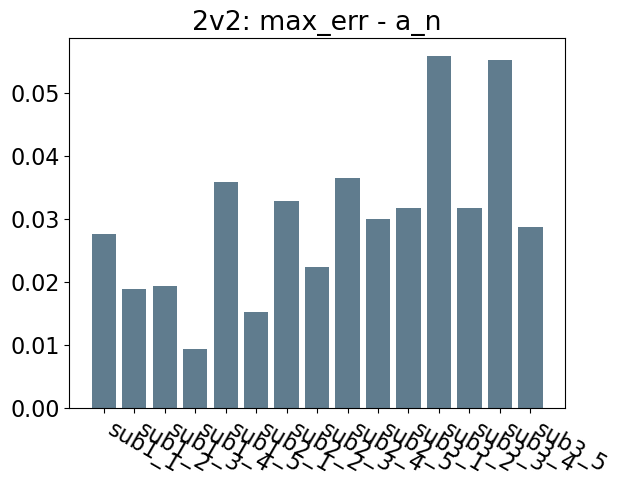

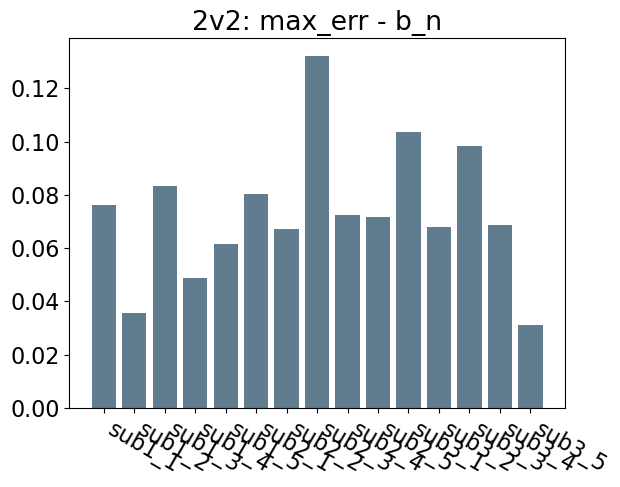

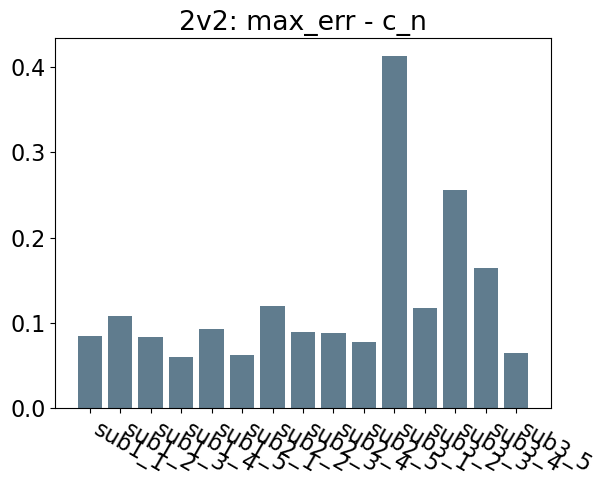

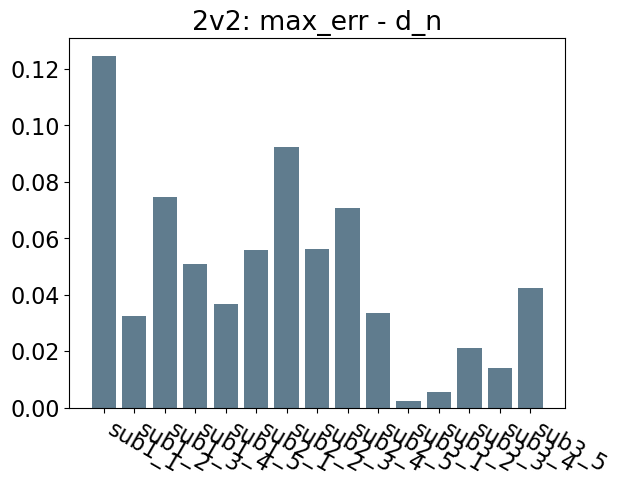

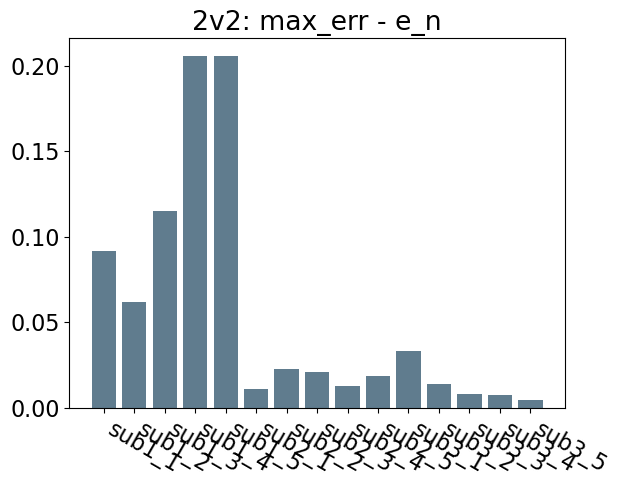

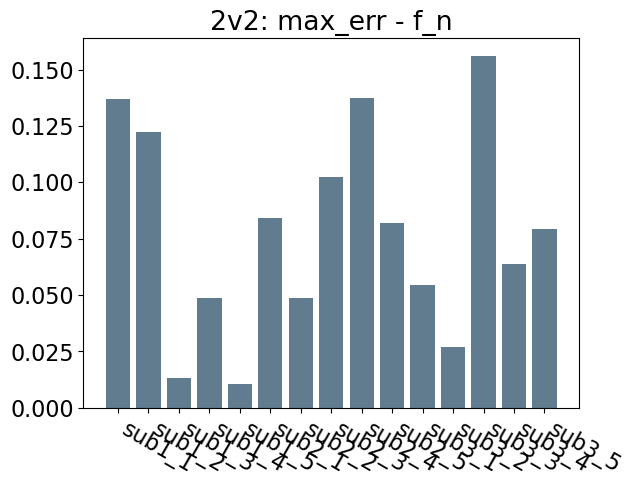

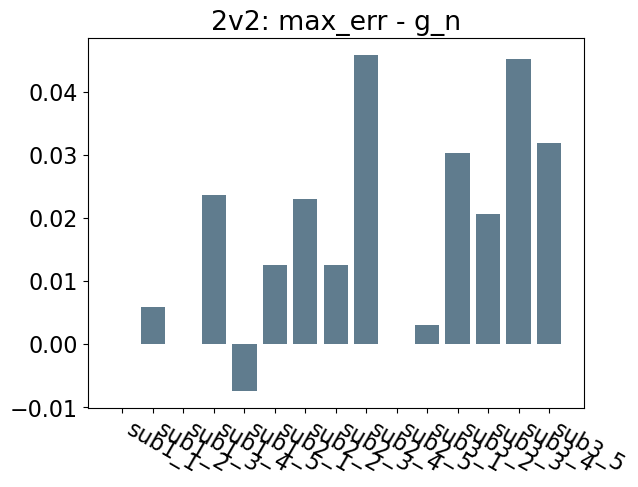

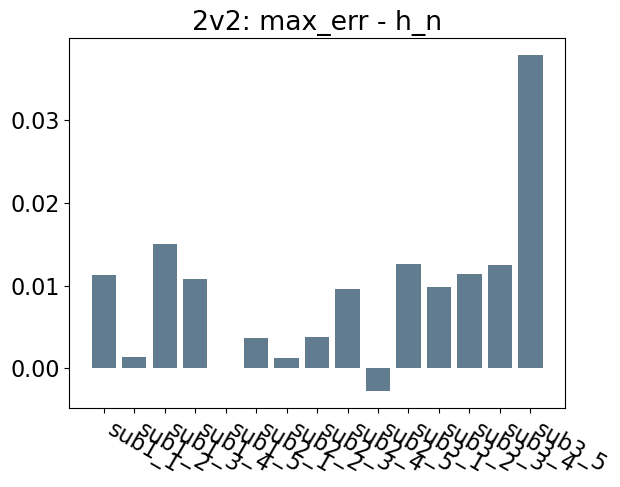

In [7]:
plt_metric_and_directions(:max_err, "xkcd:blue grey")

### Movement Efficiency

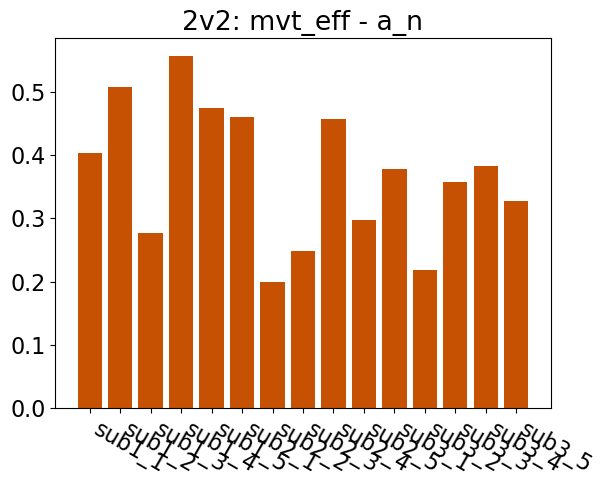

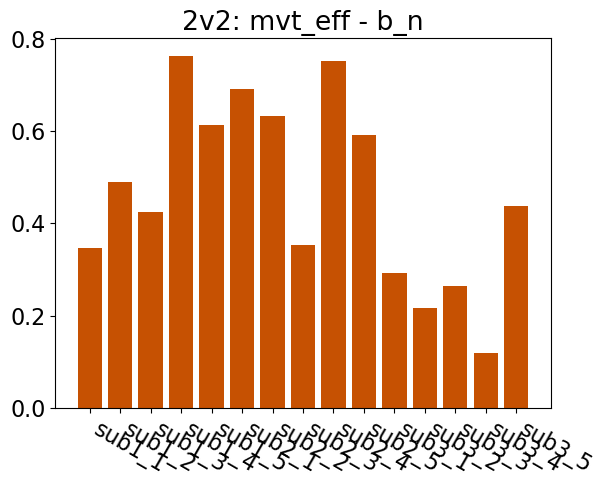

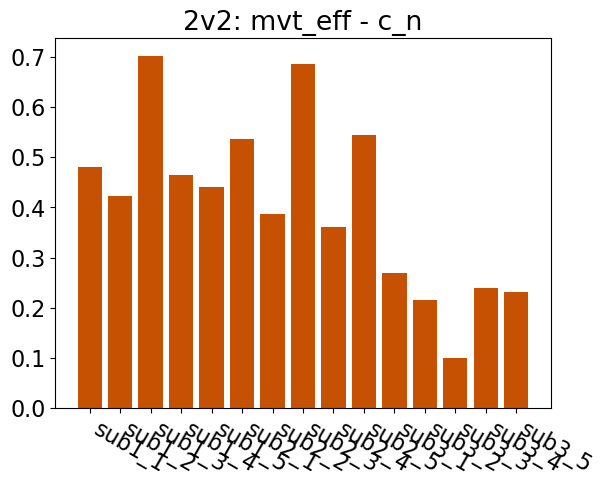

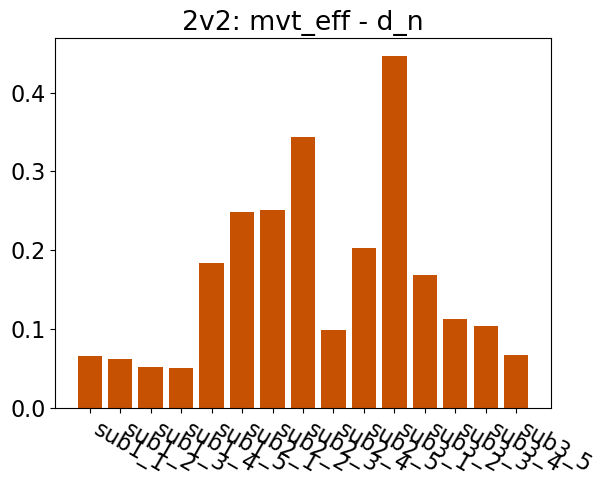

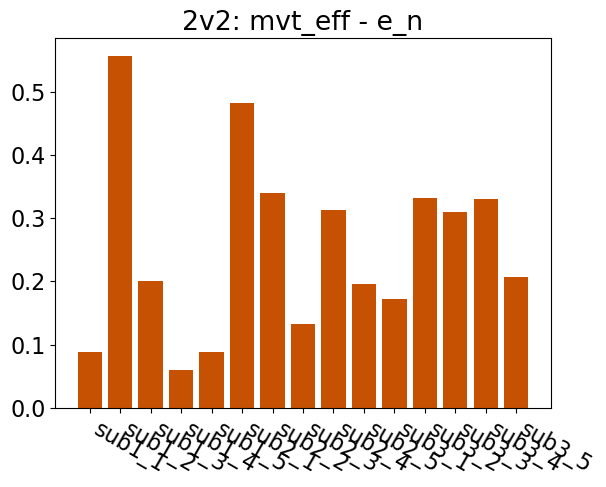

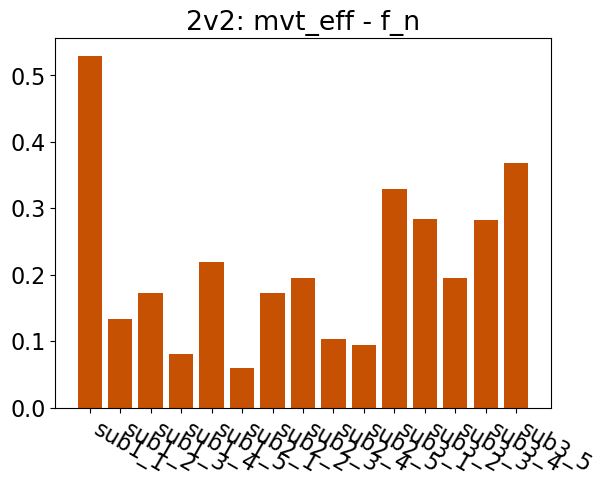

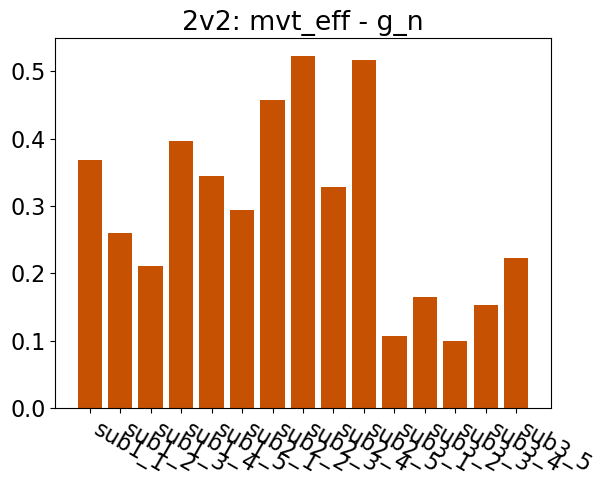

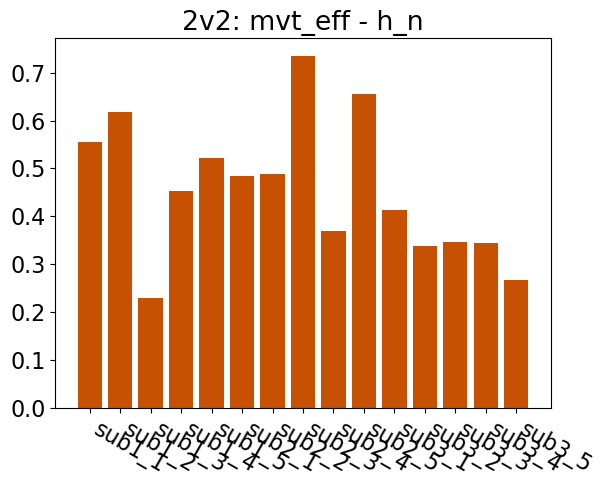

In [8]:
plt_metric_and_directions(:mvt_eff, "xkcd:dark orange")

### Max Area Region

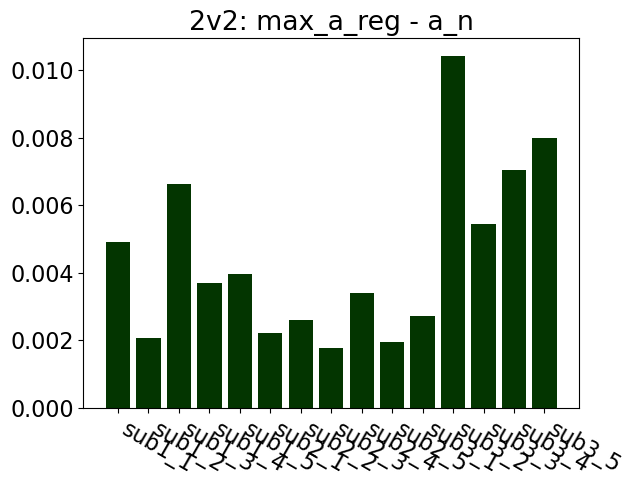

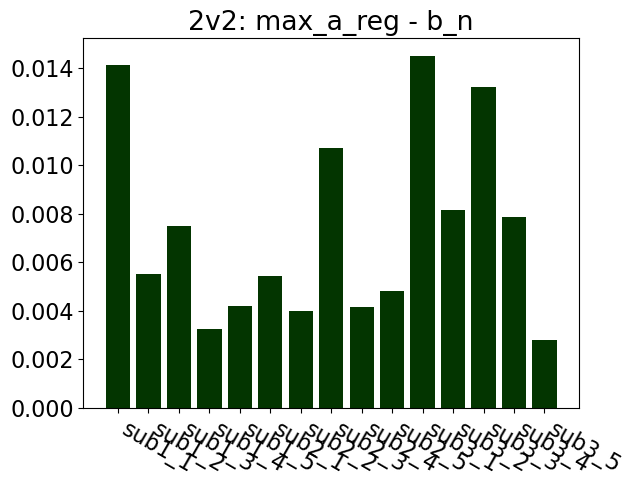

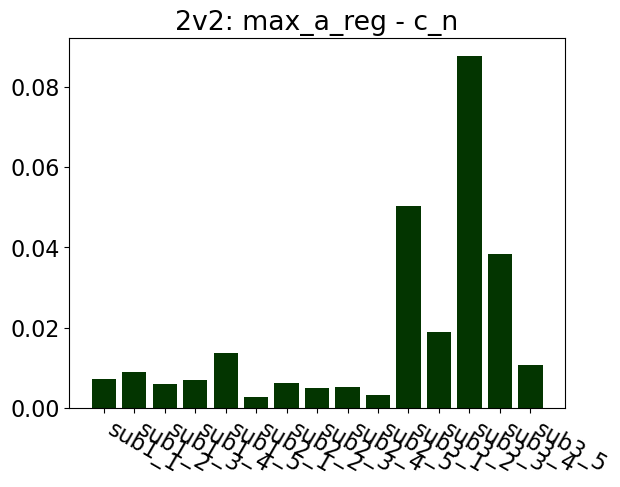

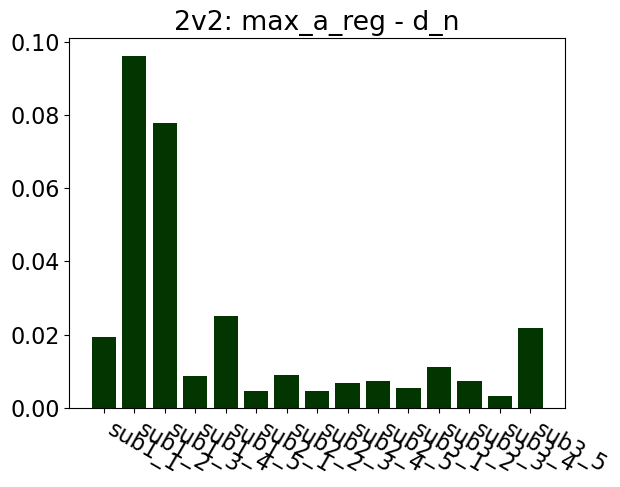

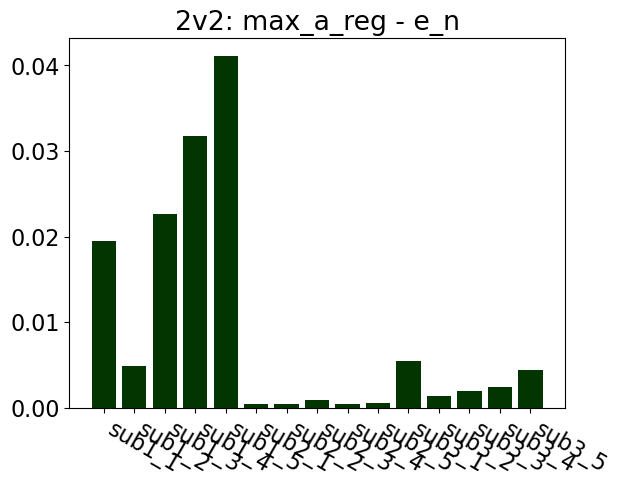

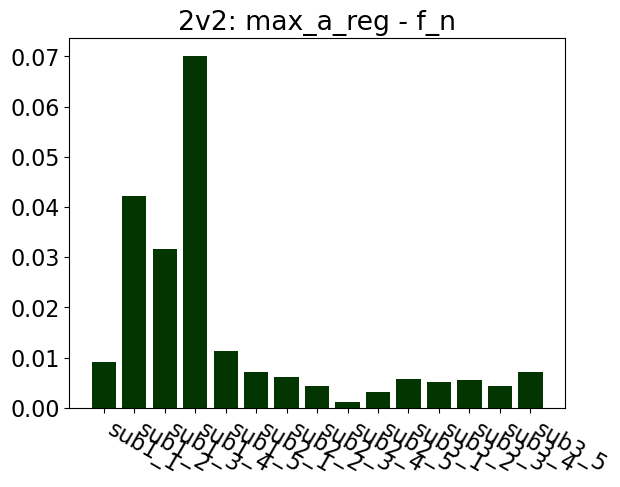

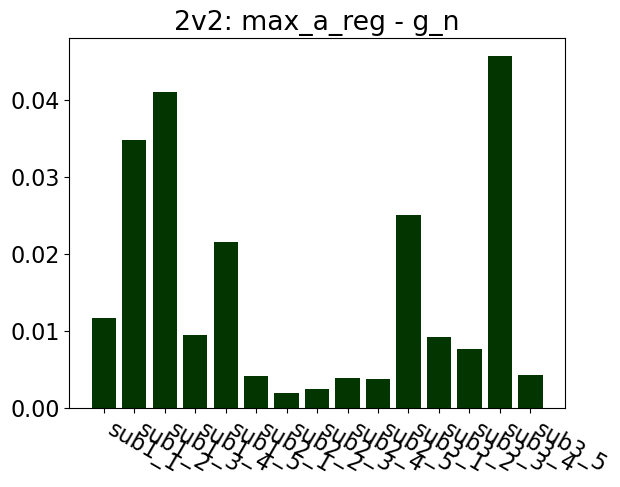

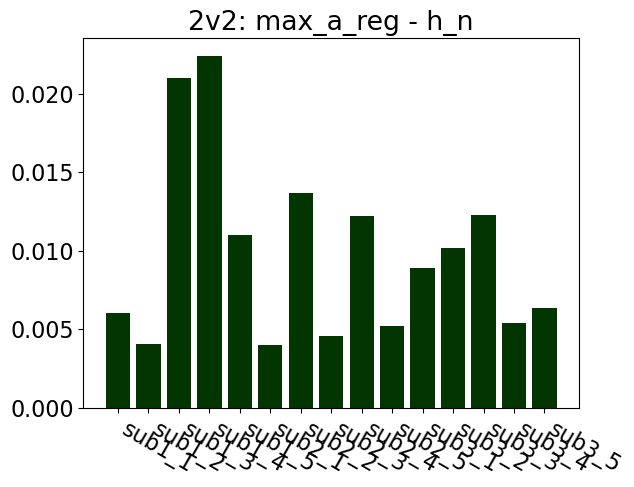

In [9]:
plt_metric_and_directions(:max_a_reg, "xkcd:dark green")

### Max Area Region Location

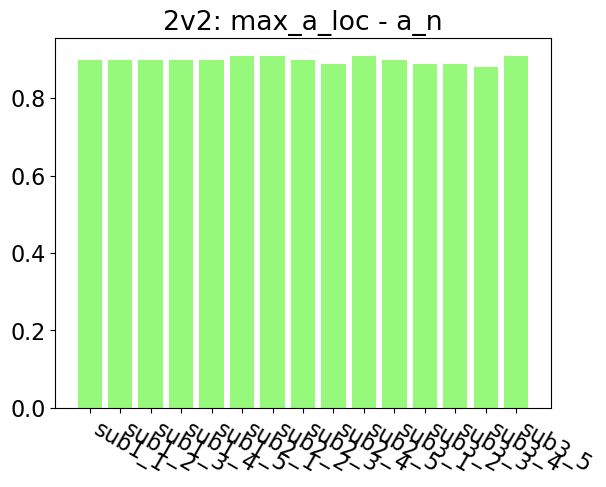

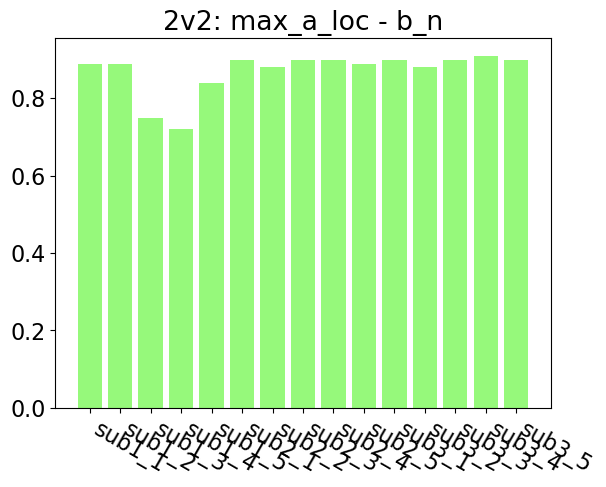

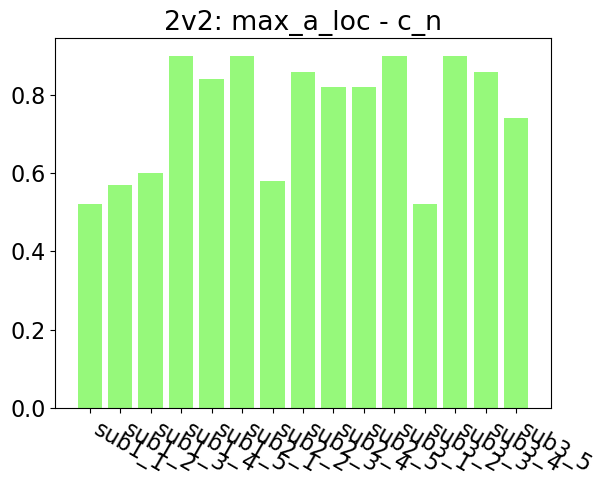

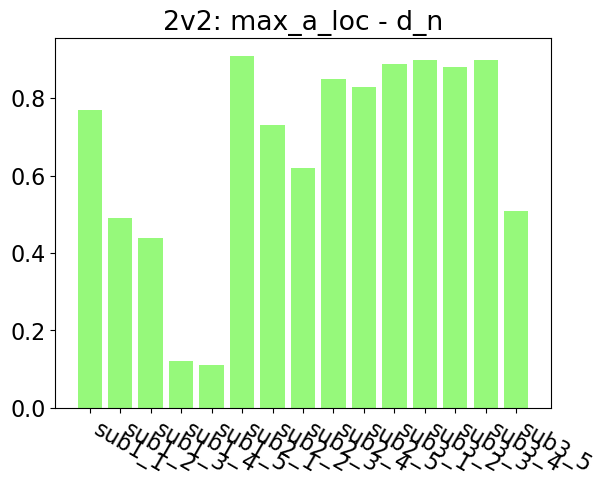

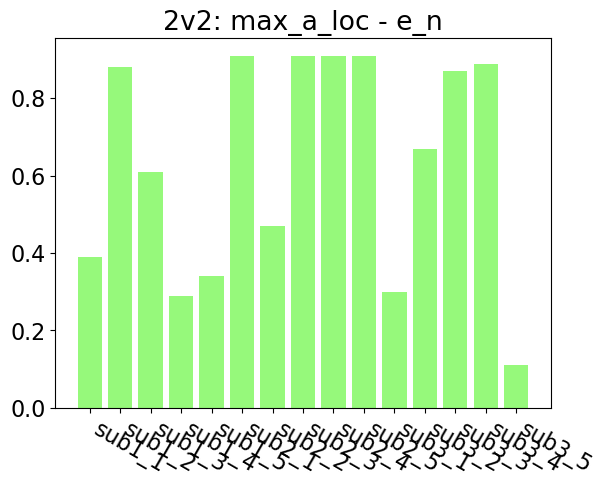

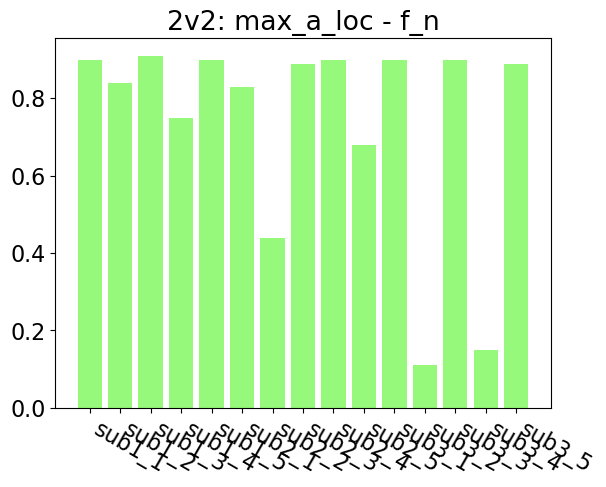

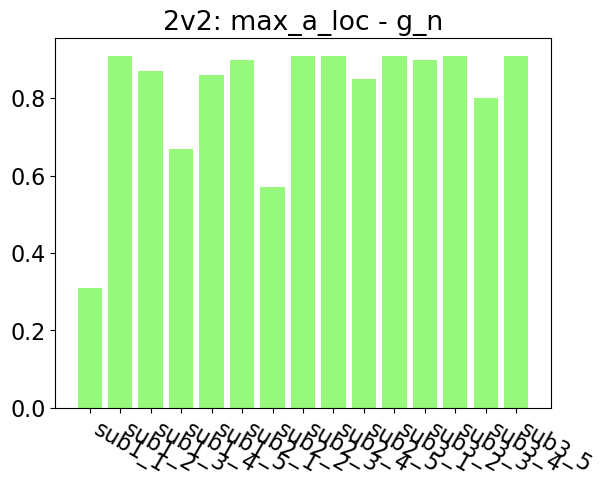

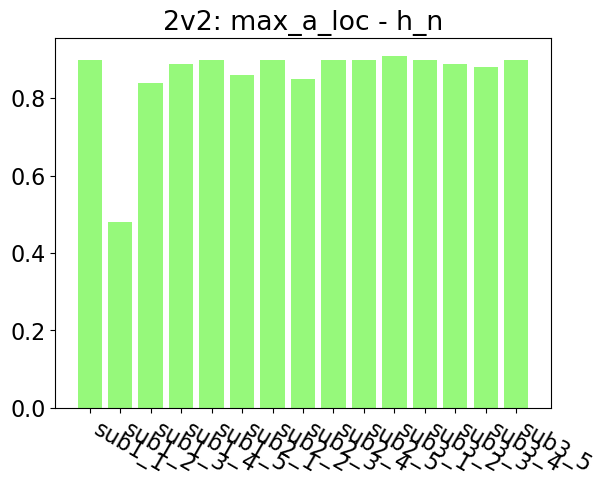

In [10]:
plt_metric_and_directions(:max_a_loc, "xkcd:light green")

### Translational Frechet Distance

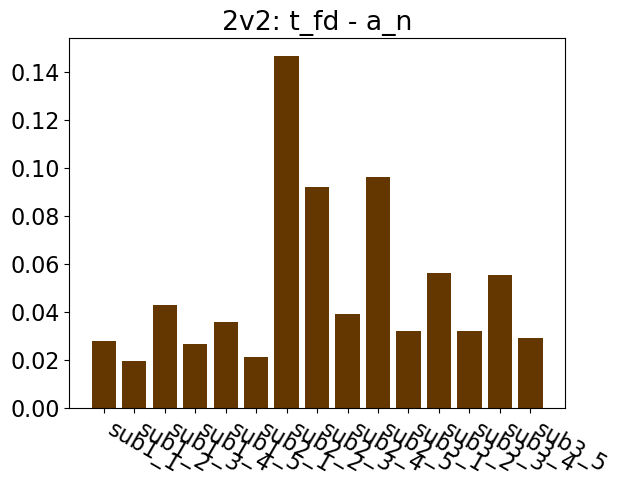

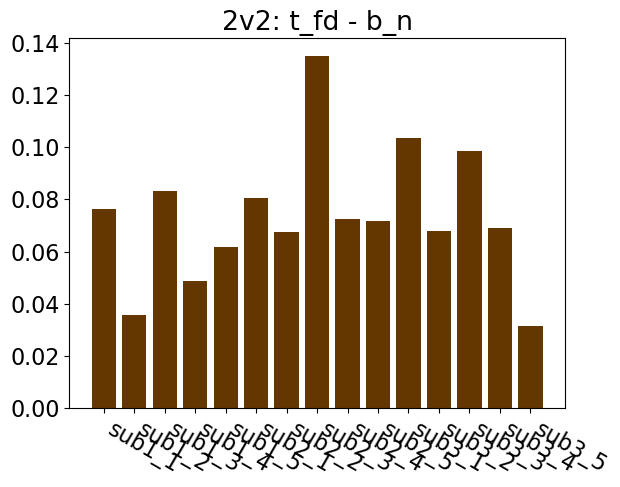

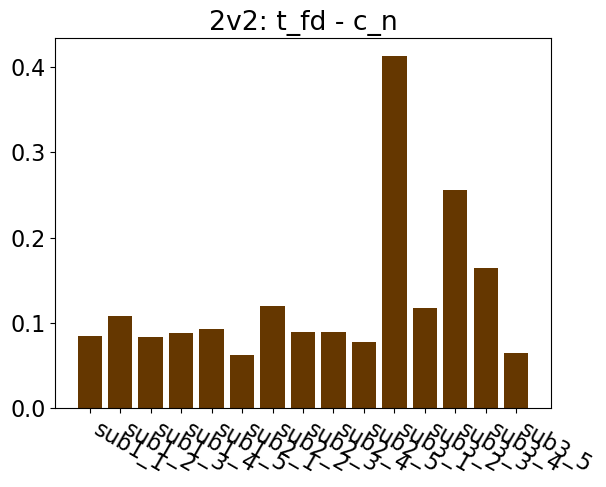

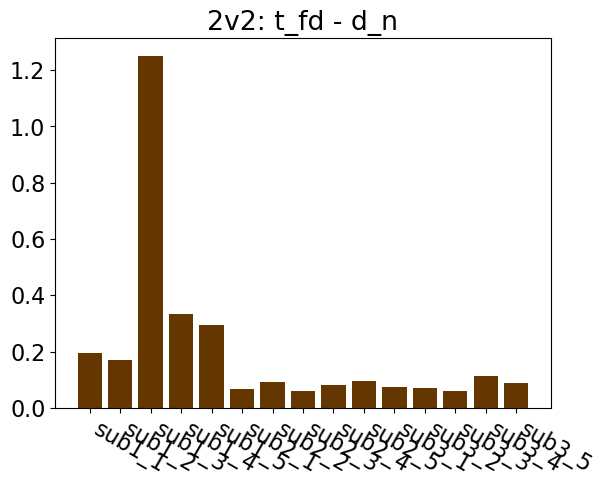

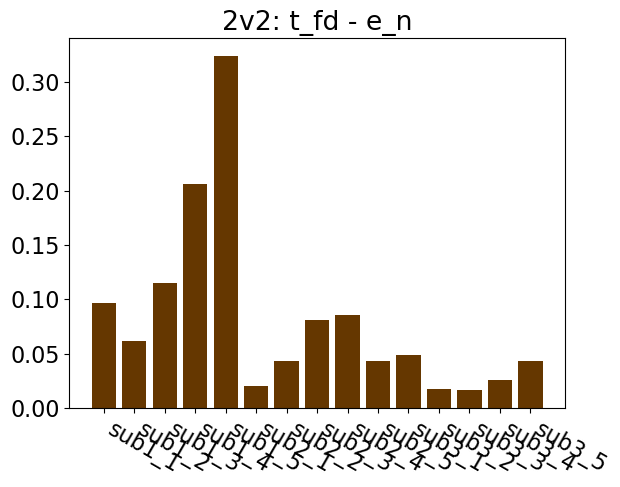

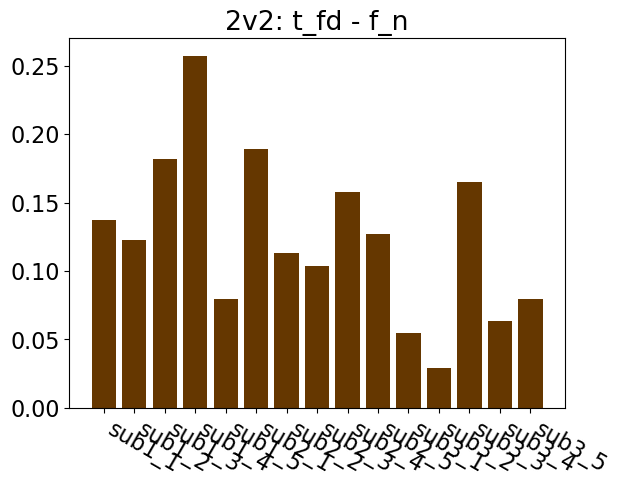

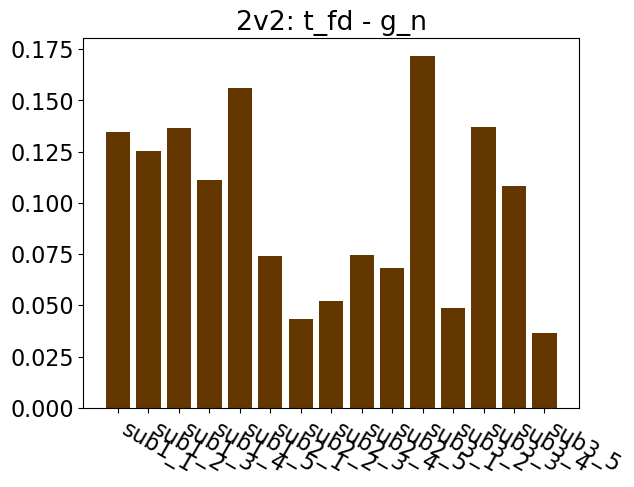

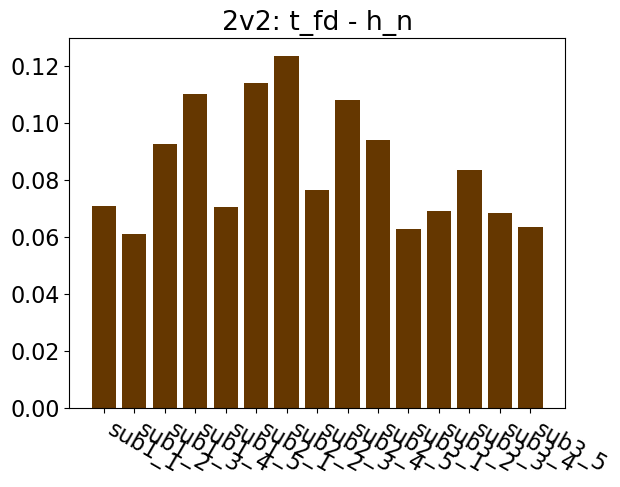

In [11]:
plt_metric_and_directions(:t_fd, "xkcd:brown")

### Rotational Frechet Distance

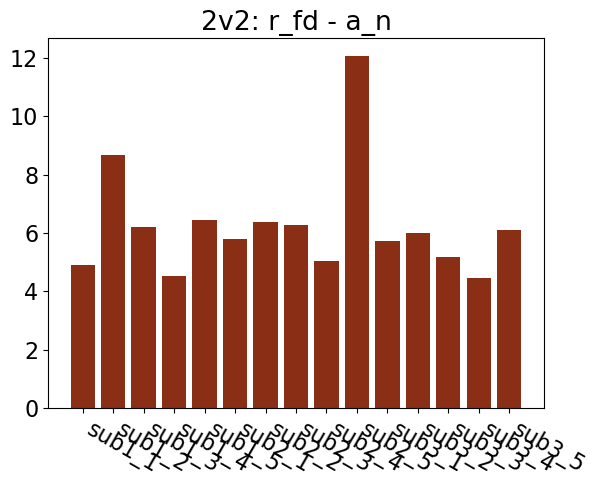

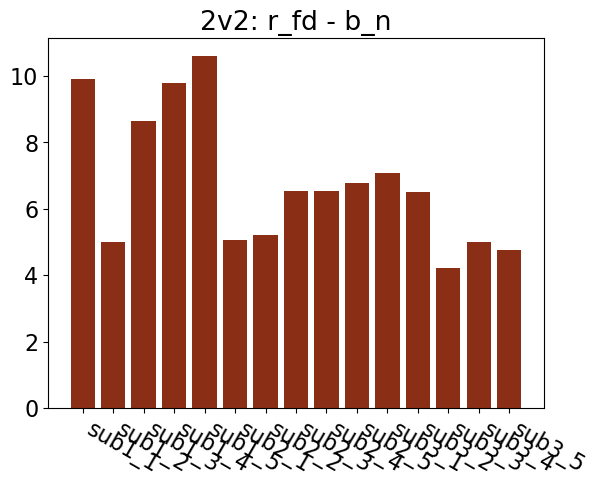

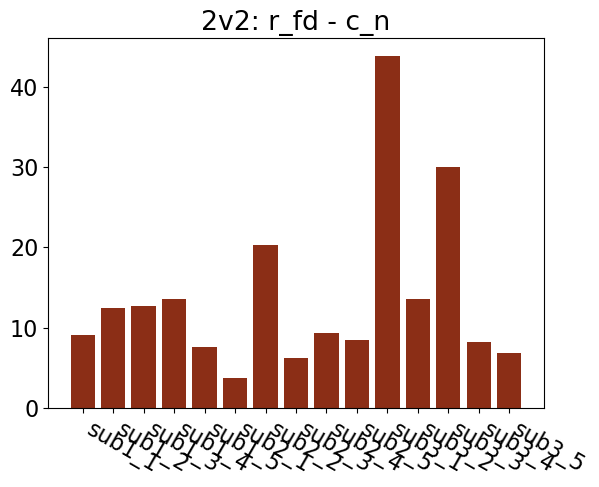

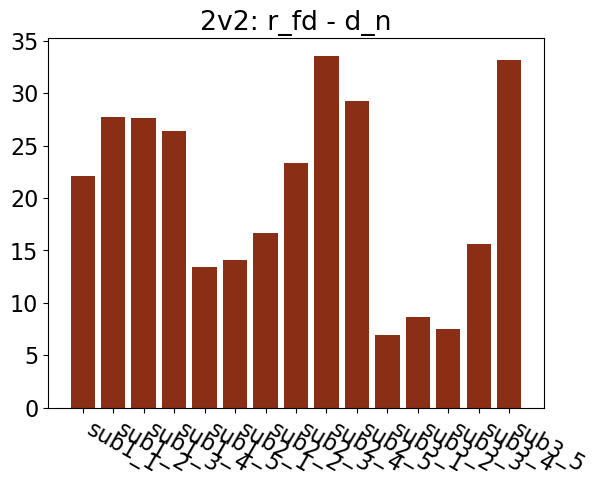

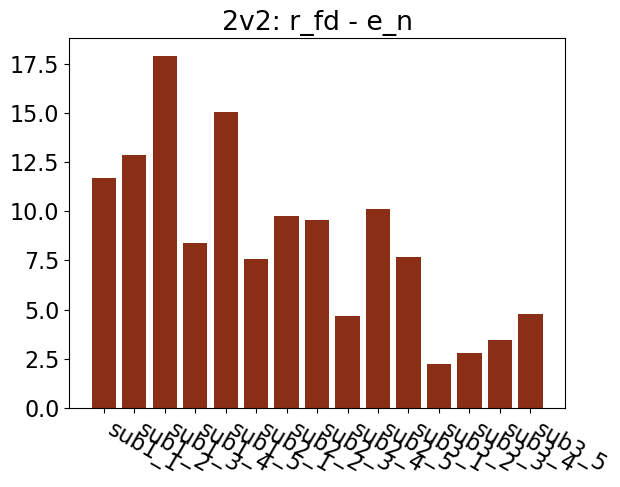

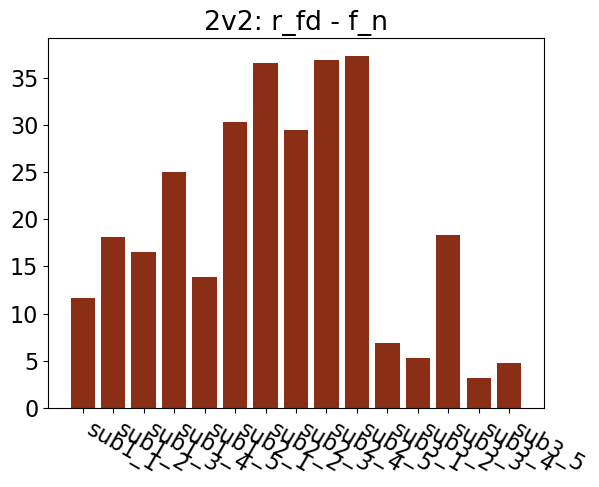

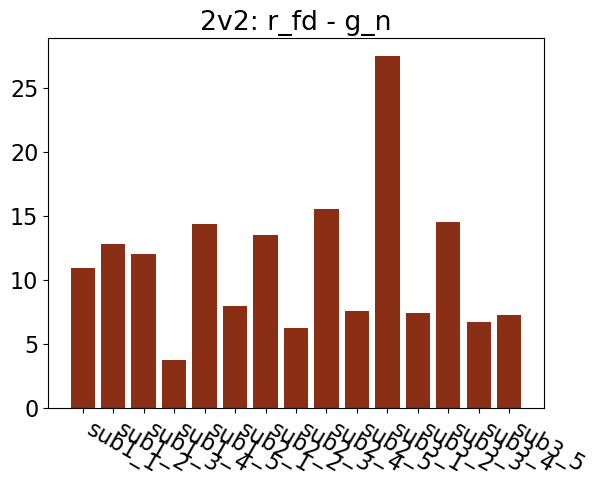

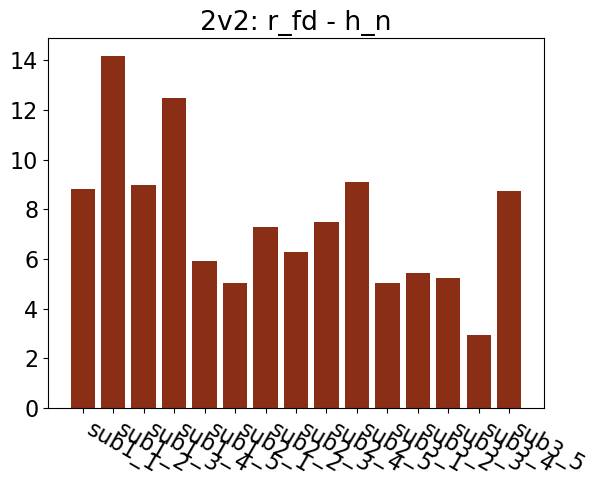

In [12]:
plt_metric_and_directions(:r_fd, "xkcd:red brown")

## Observations
Here is what I see based on the above plots.

-----

# Average Line Calculations

#### Dir: A
![Average Debug Plot for direction A](./pics/avgdebug_2v2_3subs_a_n.jpg)

#### Dir: B
![Average Debug Plot for direction B](./pics/avgdebug_2v2_3subs_b_n.jpg)

#### Dir: C
![Average Debug Plot for direction C](./pics/avgdebug_2v2_3subs_c_n.jpg)

#### Dir: D
![Average Debug Plot for direction D](./pics/avgdebug_2v2_3subs_d_n.jpg)

#### Dir: E
![Average Debug Plot for direction E](./pics/avgdebug_2v2_3subs_e_n.jpg)

#### Dir: F
![Average Debug Plot for direction F](./pics/avgdebug_2v2_3subs_f_n.jpg)

#### Dir: G
![Average Debug Plot for direction G](./pics/avgdebug_2v2_3subs_g_n.jpg)

#### Dir: H
![Average Debug Plot for direction H](./pics/avgdebug_2v2_3subs_h_n.jpg)


----

# T Tests for Symmetry

In [13]:
using HypothesisTests
# find average p-value between each trial in each direction. To get a baseline pvalue to base it on



In [14]:
function compare_2_directions(metric::Symbol)
    translations = ["a", "b", "c", "d", "e", "f", "g", "h"]
    results_report = zeros(8, 8)
    
    for t in translations
        i = findall(x->x==t, translations)[1]
        n = 0
        
        for t2 in translations[i:end]
            vals1, _ = get_trial_vals(df_2v2, metric, t)
            vals2, _ = get_trial_vals(df_2v2, metric, t2)
            
            v1 = convert(Array{Float64,1}, vals1)
            v2 = convert(Array{Float64,1}, vals2)
            
            result = pvalue(OneSampleTTest(v1, v2))
            r = round(result, digits=4)
            results_report[i, i+n] = r
            
            # println(f" For {t} v {t2}: {r}")
            n = n+1
        end
        println(" ")
    end
    return results_report
end

function print_results_report(report::Array{Float64})
    dim = 8
    translations = ["a", "b", "c", "d", "e", "f", "g", "h"]
    
    println(f"     a     b     c     d     e     f     g     h")
    for i in range(1, stop=dim)
        print(translations[i])
        print("   ")
        for n in range(1, stop=dim)
            print(report[i, n])
            print("   ")
        end
        println(" |")
    end
end

r = compare_2_directions(:max_a_reg)    
#print_results_report(r)

8×8 Array{Float64,2}:
 NaN      0.0308    0.0389    0.0435    0.1845    0.0728    0.0132    0.0034
   0.0  NaN         0.0732    0.0984    0.6172    0.2167    0.0626    0.2316
   0.0    0.0     NaN         0.8179    0.2561    0.6661    0.6592    0.2075
   0.0    0.0       0.0     NaN         0.1384    0.3508    0.3744    0.1593
   0.0    0.0       0.0       0.0     NaN         0.2491    0.2024    0.8376
   0.0    0.0       0.0       0.0       0.0     NaN         0.8786    0.3166
   0.0    0.0       0.0       0.0       0.0       0.0     NaN         0.2088
   0.0    0.0       0.0       0.0       0.0       0.0       0.0     NaN

In [15]:
results_report = zeros(8, 8)
results_report[4,3] = NaN
results_report[4,:]

8-element Array{Float64,1}:
   0.0
   0.0
 NaN
   0.0
   0.0
   0.0
   0.0
   0.0

# Clustering for Symmetry

In [16]:
test = [1, 2, 3, 4, 5]
t = 2
i = findall(x->x!=t, test)

4-element Array{Int64,1}:
 1
 3
 4
 5